# Prison Population Changes During COVID

## Background Summary

I was asked to analyze historical data from state of Illinois Department of Corrections (IDOC) in response to questions whether or not there was any disparate impact in the manner in which the prison populations have changed throughout the COVID-19 crisis for the Fayette County State's Attorney's Office. This was in response to a request from officials to file a lawsuit to force the IDOC to receive prisoners from the county jails that have been sentenced.

As a historical note, a lawsuit was filed against IDOC in 2020 by the Illinois Association of Sheriffs. That lawsuit was successful at the Circuit level, but was overturned at the Appellate level; however, that if Executive Order 99, which allowed for the prisoners to be moved to IDOC under certain conditiions, was made in bad faith, the matter could be reviewed. As "bad faith" is a legal term, this analysis makes no comment on whether or not "bad faith" occurred, but will summarize the effects of the policies that have been made.

## Code & Analysis

The following cells set up the data cleaning and analysis. 

In [145]:
# importing packages
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
%config IPCompleter.greedy=True
pd.set_option('display.max_rows', None)

In [146]:
# defining a function to set COVID regions
def set_value(row_number, assigned_value):
    return assigned_value[row_number]

In [147]:
# county to COVID region values
values = {'Cook': '10/11', 'Boone': '1', 'Carroll': '1', 'DeKalb':'1', 'Jo Daviess':'1', 'Lee':'1', 'Ogle':'1', 
          'Stephenson':'1', 'Whiteside':'1', 'Winnebago':'1', 'Bureau':'2', 'Fulton':'2', 'Grundy':'2', 
          'Henderson':'2', 'Henry':'2', 'Kendall':'2', 'Knox':'2', 'Lasalle':'2', 'Livingston':'2', 'Marshall':'2', 
          'McDonough':'2', 'McLean':'2', 'Mercer':'2', 'Peoria':'2', 'Putnam':'2', 'Rock Island':'2', 'Stark':'2', 
          'Tazewell':'2', 'Warren':'2', 'Woodford':'2', 'Adams': '3', 'Brown': '3', 'Calhoun': '3', 'Cass': '3', 
          'Christian': '3', 'Greene': '3', 'Hancock': '3', 'Jersey':'3', 'Logan': '3', 'Macoupin':'3', 'Mason':'3', 
          'Mason':'3', 'Menard':'3', 'Montgomery':'3', 'Morgan':'3', 'Pike':'3', 'Sangamon':'3', 'Schuyler':'3', 
          'Scott':'3', 'Bond':'4', 'Clinton':'4', 'Madison':'4', 'Monroe':'4', 'Randolph':'4', 'St. Clair':'4', 
          'Washington':'4', 'Alexander':'5', 'Edwards':'5', 'Franklin':'5', 'Gallatin':'5', 'Hamilton':'5', 
          'Hardin':'5', 'Jackson':'5', 'Jefferson':'5', 'Johnson':'5', 'Marion':'5', 'Massac':'5', 'Perry':'5', 
          'Pope':'5', 'Pulaski':'5', 'Saline':'5', 'Union':'5', 'Wabash':'5', 'Wayne':'5', 'White':'5', 
          'Williamson':'5', 'Champaign':'6', 'Clark':'6', 'Clay':'6', 'Coles':'6', 'Crawford':'6', 
          'Cumberland':'6', 'DeWitt':'6', 'Douglas':'6', 'Edgar':'6', 'Effingham':'6', 'Fayette':'6', 
          'Ford':'6', 'Iroquois':'6', 'Jasper':'6', 'Lawrence':'6', 'Macon':'6', 'Moultrie':'6', 'Piatt':'6', 
          'Richland':'6', 'Shelby':'6', 'Vermilion':'6', 'Kankakee':'7', 'Will':'7', 'DuPage':'8', 'Kane':'8', 
          'Lake':'9', 'McHenry':'9', 'Out of state': 'Out of state'}

In [148]:
# definition of process to read excel files, delete extra rows and columns, change date format, and add COVID regions for each file.
def process(df):
    df = pd.read_excel(df, skiprows=5)
    #removing extra columns
    df = df.iloc[:,1:20]
    #removing extra rows
    df = df.iloc[:-11,:]
    #changing Current Admission Date to datetime
    df['Current Admission Date'] = pd.to_datetime(df['Current Admission Date'])
    #add COVID regions
    df['COVID Region'] = df['Sentencing County'].apply(set_value, args =(values, ))
    return df

I added the COVID Regions assigned by the Governor to check for disparate impact amongst the regions. These region were taken from the Illions Department of Public Health on 3/26/2021 from https://www.dph.illinois.gov/sites/default/files/COVID19/IL%20Resurgence%20Mitigation%20Plan%20-%20January%2022%2C%202021%20Update.pdf. Spelling inconsistancies were corrected by using the spelling in the IDOC data and modifying the spelling from the IDPH data.

Prison population spreadsheets were found at https://www2.illinois.gov/idoc/reportsandstatistics/Pages/Prison-Population-Data-Sets.aspx. These spreadsheets are completed every quarter by IDOC and track prison population data including name, age, gender, race, parent institution, sentencing county, and other information from each prisoner. Some files had in consistencies in the spelling of "DuPage" county as "DuPage" or "Dupage". These consistencies were changed in the Excel spreadsheet and saved in .xlsx format. The spreadsheets had relatively clean data otherwise.

The following cells process the individual quarterly prison population reports and combine the reports into one dataframe for analysis across quarters.

In [149]:
df_Dec_2020 = process('Dec_2020_Prison_Pop.xlsx')

In [150]:
df_Dec_2019 = process('Dec_2019_Prison_Pop.xls')

In [151]:
df_Sep_2020 = process('Sep_2020_Prison_Pop.xlsx')

In [152]:
df_Sep_2019 = process('Sep_2019_Prison_Pop.xls')

In [153]:
df_Jun_2020 = process('Jun_2020_Prison_Pop.xls')

In [154]:
df_Jun_2019 = process('Sep_2019_Prison_Pop.xls')

In [155]:
df_Mar_2020 = process('Mar_2020_Prison_Pop.xlsx')

In [156]:
df_Mar_2019 = process('Mar_2019_Prison_Pop.xlsx')

In [157]:
df_Mar_2021 = process('Mar_2021_Prison_Pop.xlsx')

In [158]:
# finding prior three months admissions from each report. This will be used to find the statistics of new admitances.
df_Mar_2021_new = df_Mar_2021[df_Mar_2021['Current Admission Date'] >= '2021-01-01']
df_Dec_2020_new = df_Dec_2020[df_Dec_2020['Current Admission Date'] >= '2020-10-01']
df_Sep_2020_new = df_Sep_2020[df_Sep_2020['Current Admission Date'] >= '2020-06-01']
df_Jun_2020_new = df_Jun_2020[df_Jun_2020['Current Admission Date'] >= '2020-03-01']
df_Mar_2020_new = df_Mar_2020[df_Mar_2020['Current Admission Date'] >= '2020-01-01']
df_Dec_2019_new = df_Dec_2019[df_Dec_2019['Current Admission Date'] >= '2019-10-01']
df_Sep_2019_new = df_Sep_2019[df_Sep_2019['Current Admission Date'] >= '2019-06-01']
df_Jun_2019_new = df_Jun_2019[df_Jun_2019['Current Admission Date'] >= '2019-03-01']
df_Mar_2019_new = df_Mar_2019[df_Mar_2019['Current Admission Date'] >= '2019-01-01']

In [159]:
#creating new admissions list for admissions in three months prior to each report
df_list_new = [df_Mar_2019_new, df_Jun_2019_new, df_Sep_2019_new, df_Dec_2019_new, df_Mar_2020_new, df_Jun_2020_new, df_Sep_2020_new, df_Dec_2020_new, df_Mar_2021_new]
name_list = ['March 2019', 'June 2019', 'September 2019', 'December 2019', 'March 2020', 'June 2020', 'September 2020', 'December 2020', 'March 2021']

In [160]:
df_list = [df_Mar_2019, df_Jun_2019, df_Sep_2019, df_Dec_2019, df_Mar_2020, df_Jun_2020, df_Sep_2020, df_Dec_2020, df_Mar_2021]
name_list = ['March 2019', 'June 2019', 'September 2019', 'December 2019', 'March 2020', 'June 2020', 'September 2020', 'December 2020', 'March 2021']


The next section of code does the analysis of the data. We will begin with an analysis of sentencing counties in order to see if there is a significant change in the prison population coming from each county.

In [161]:
# process function
def averageprocess(col):
    col_rel = list([])
    for d in df_list:    
        df = pd.DataFrame(d[col].value_counts(normalize = True, ascending = False))
        df = df.sort_index()
        col_rel.append(df)
    df_dat = pd.concat(col_rel, axis = 1, sort = True)
    df_dat.columns = name_list
    df_dat = df_dat.fillna(0)
    temp_df = df_dat[['March 2019', 'June 2019', 'September 2019', 'December 2019']]
    temp_df2 = df_dat[['June 2020', 'September 2020', 'December 2020', 'March 2021']]
    df_dat['March Change From Pre-Covid (2019) Levels'] = df_dat['March 2021'] - temp_df.mean(axis = 1)
    df_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = temp_df2.mean(axis = 1) - temp_df.mean(axis = 1)
    return df_dat

In [162]:
# June 2020 - March 2021 process function hard numbers
def hardaverageprocess(col):
    col_rel = list([])
    for d in df_list:    
        df = pd.DataFrame(d[col].value_counts(ascending = False))
        df = df.sort_index()
        col_rel.append(df)
    df_dat = pd.concat(col_rel, axis = 1)
    df_dat.columns = name_list
    df_dat = df_dat.fillna(0)
    temp_df = df_dat[['March 2019', 'June 2019', 'September 2019', 'December 2019']]
    temp_df2 = df_dat[['June 2020', 'September 2020', 'December 2020', 'March 2021']]
    df_dat['March Change From Pre-Covid (2019) Levels'] = (df_dat['March 2021'] - temp_df.mean(axis = 1))/temp_df.mean(axis = 1)
    df_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = (temp_df2.mean(axis = 1) - temp_df.mean(axis = 1))/temp_df.mean(axis = 1)
    return df_dat

In [163]:
# June 2020 - March 2021 process function for new inmates
def newaverageprocess(col):
    col_rel = list([])
    for d in df_list_new:    
        df = pd.DataFrame(d[col].value_counts(normalize = True, ascending = False))
        df = df.sort_index()
        col_rel.append(df)
    df_dat = pd.concat(col_rel, axis = 1, sort = True)
    df_dat.columns = name_list
    df_dat = df_dat.fillna(0)
    temp_df = df_dat[['March 2019', 'June 2019', 'September 2019', 'December 2019']]
    temp_df2 = df_dat[['June 2020', 'September 2020', 'December 2020', 'March 2021']]
    df_dat['March Change From Pre-Covid (2019) Levels'] = df_dat['March 2021'] - temp_df.mean(axis = 1)
    df_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = temp_df2.mean(axis = 1) - temp_df.mean(axis = 1)
    return df_dat

In [164]:
# June 2020 - March 2021 process function for new inmates hard numbers
def hardnewaverageprocess(col):
    col_rel = list([])
    for d in df_list_new:    
        df = pd.DataFrame(d[col].value_counts(ascending = False))
        df = df.sort_index()
        col_rel.append(df)
    df_dat = pd.concat(col_rel, axis = 1, sort = True)
    df_dat.columns = name_list
    df_dat = df_dat.fillna(0)
    temp_df = df_dat[['March 2019', 'June 2019', 'September 2019', 'December 2019']]
    temp_df2 = df_dat[['June 2020', 'September 2020', 'December 2020', 'March 2021']]
    df_dat['March Change From Pre-Covid (2019) Levels'] = (df_dat['March 2021'] - temp_df.mean(axis = 1))/temp_df.mean(axis = 1)
    df_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = (temp_df2.mean(axis = 1) - temp_df.mean(axis = 1))/temp_df.mean(axis = 1)
    return df_dat

In [165]:
#find the relative frequency of the Sentencing County for the total population for June 2020 - March 2021
counties_dat = averageprocess('Sentencing County')

In [166]:
print('March Max: ', counties_dat['March Change From Pre-Covid (2019) Levels'].max())
print('March Min: ', counties_dat['March Change From Pre-Covid (2019) Levels'].min())

print('Average Max: ', counties_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].max())
print('Average Min: ', counties_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].min())

March Max:  0.004239696541555305
March Min:  -0.017602152543206184
Average Max:  0.002997775560409411
Average Min:  -0.015884912507072357


In [167]:
counties_dat1 = counties_dat.style.format('{:.2%}')
counties_dat1

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Adams,0.87%,0.93%,0.93%,0.92%,0.92%,0.90%,0.88%,0.91%,0.95%,0.04%,-0.00%
Alexander,0.10%,0.11%,0.11%,0.11%,0.11%,0.11%,0.11%,0.12%,0.12%,0.02%,0.01%
Bond,0.20%,0.20%,0.20%,0.21%,0.22%,0.22%,0.24%,0.25%,0.22%,0.02%,0.03%
Boone,0.52%,0.59%,0.59%,0.64%,0.66%,0.60%,0.64%,0.63%,0.66%,0.08%,0.05%
Brown,0.02%,0.02%,0.02%,0.02%,0.03%,0.03%,0.02%,0.02%,0.02%,0.00%,0.00%
Bureau,0.29%,0.27%,0.27%,0.26%,0.27%,0.24%,0.25%,0.26%,0.25%,-0.02%,-0.02%
Calhoun,0.06%,0.05%,0.05%,0.04%,0.06%,0.06%,0.06%,0.06%,0.04%,-0.01%,0.00%
Carroll,0.07%,0.08%,0.08%,0.08%,0.07%,0.06%,0.07%,0.08%,0.08%,0.00%,-0.00%
Cass,0.08%,0.06%,0.06%,0.05%,0.05%,0.04%,0.06%,0.07%,0.07%,0.01%,-0.00%
Champaign,2.24%,2.21%,2.21%,2.17%,2.14%,2.22%,2.37%,2.41%,2.36%,0.16%,0.13%


This table shows that, when considering the average percentage of inmates coming from each county from March 2019 to December 2019, the March 2019 percentages coming from each county do not change significantly. In other words, the proportion of inmates coming from each county did not significantly change from pre-COVID to March 2021 levels. The greatest change was a loss from Cook County at 1.76%.

I also considered the average pre-COVID levels (June 2019 - December 2019) compared to the average COVID levels. I considered only June 2020 - March 2021 in the average as the months covered by the March 2020 report may or may not have been covered by COVID policy changes. In this chart, the lack of change is even more clear, except for Cook County. Cook County's portion of inmate population decreased by 1.59% using this method.

In [168]:
#find the relative frequency of the Sentencing County for the total population
counties_dat.loc[['Fayette', 'Cook']]

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Fayette,0.002594,0.002724,0.002724,0.002569,0.002520,0.002496,0.002331,0.002267,0.002218,-0.000434,-0.000325
Cook,0.464874,0.456655,0.456655,0.451626,0.445914,0.450168,0.439200,0.437051,0.439850,-0.017602,-0.015885


As listing each county separately shows a considerable amount of information, I pulled the county of concern and Cook county. These relative frequencies show that there is not much change in the portion of the prison population that comes from each county as compared to the whole. In other words, about 46% of the prison population came from Cook county in March of 2019 and about 44% came from Cook county in March 2021.

Above, I considered the total population change; however, considering only new inmate population may shed light on how recent convictions are being treated.

In [169]:
# finding the relative frequency of the Sentencing County for new admissions in March 2021
counties_dat = newaverageprocess('Sentencing County')

In [170]:
print('Max: ', counties_dat['March Change From Pre-Covid (2019) Levels'].max())
print('Min: ', counties_dat['March Change From Pre-Covid (2019) Levels'].min())

Max:  0.02273862284998092
Min:  -0.07473570140901076


In [171]:
# for future reference, here is the listing of all counties for new admitances
counties_dat = counties_dat.style.format('{:.2%}')
counties_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Adams,0.88%,1.13%,1.03%,0.94%,0.97%,1.46%,0.51%,1.79%,1.37%,0.38%,0.29%
Alexander,0.07%,0.06%,0.08%,0.07%,0.11%,0.16%,0.07%,0.20%,0.00%,-0.07%,0.04%
Bond,0.13%,0.23%,0.15%,0.35%,0.29%,0.24%,0.51%,0.35%,0.00%,-0.22%,0.06%
Boone,0.77%,0.93%,1.00%,0.96%,0.74%,0.32%,1.02%,0.90%,1.26%,0.34%,-0.04%
Brown,0.00%,0.03%,0.02%,0.05%,0.05%,0.00%,0.07%,0.10%,0.00%,-0.02%,0.02%
Bureau,0.46%,0.34%,0.25%,0.19%,0.29%,0.24%,0.33%,0.25%,0.63%,0.32%,0.05%
Calhoun,0.00%,0.08%,0.11%,0.07%,0.05%,0.08%,0.07%,0.05%,0.00%,-0.07%,-0.02%
Carroll,0.13%,0.15%,0.20%,0.07%,0.08%,0.24%,0.26%,0.15%,0.11%,-0.02%,0.05%
Cass,0.15%,0.06%,0.07%,0.05%,0.03%,0.00%,0.18%,0.20%,0.06%,-0.03%,0.03%
Champaign,1.75%,1.70%,1.81%,1.43%,1.84%,2.03%,3.58%,2.34%,1.49%,-0.18%,0.69%


This table shows that, when considering the average percentage of new inmates coming from each county from March 2019 to December 2019, most of the March 2019 percentages coming from each county do not change greatly. In other words, the proportion of inmates coming from each county did not significantly change from pre-COVID to March 2021 levels. Cook County lost 7.47% percentage points against the whole when considering March 2021 against pre-COVID levels. Winnebago County gained 2.27%, McLean County gained 1.74%, and Sangamon County gained 1.61%, and Will County lost 1.57%. Although these chnages are small, they are interesting.

### Question for further research: What factors led to these increases/decreases? Does it matter?

On initial inspection, it is a possibility that some of these actions could be politcally motivated as several Counties are associated with politically damaging lawsuits. The current administration ran on reducing prison population. That message resonated more deeply with Cook and surrounding counties, and activists have continued to push for a decrease in population. Cook County also had a large COVID outbreak in the jail that would further limit the number of inmates that could be sent to IDOC. McLean County had a well-publicized incident in which 33 inmates were turned away from an IDOC facility, and Sangamon County was the home of several COVID-related lawsuits. Winnebego County is home to a class action lawsuit filed in August of 2020 alleging illegal detention. However, Will County was home to a large COVID outbreak in December. This would have affected the ability of IDOC to take prisoners. 

In [172]:
# #finding the relative frequency of the Sentencing County for new admissions from June 2020 - March 2021
counties_dat = newaverageprocess('Sentencing County')

In [173]:
print('Max: ', counties_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].max())
print('Min: ', counties_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].min())

Max:  0.009931147669355073
Min:  -0.09379277826738275


In [174]:
# finding the relative frequency of new admitances from Fayette and Cook
counties_dat.loc[['Fayette', 'Cook']]

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Fayette,0.003096,0.004577,0.005089,0.003524,0.001844,0.002433,0.001461,0.002486,0.001145,-0.002927,-0.002190
Cook,0.424812,0.398481,0.405614,0.398026,0.383298,0.326845,0.285610,0.307310,0.331998,-0.074736,-0.093793


In [175]:
# for future reference, here is the listing of all counties for new admitances
counties_dat = counties_dat.style.format('{:.2%}')
counties_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Adams,0.88%,1.13%,1.03%,0.94%,0.97%,1.46%,0.51%,1.79%,1.37%,0.38%,0.29%
Alexander,0.07%,0.06%,0.08%,0.07%,0.11%,0.16%,0.07%,0.20%,0.00%,-0.07%,0.04%
Bond,0.13%,0.23%,0.15%,0.35%,0.29%,0.24%,0.51%,0.35%,0.00%,-0.22%,0.06%
Boone,0.77%,0.93%,1.00%,0.96%,0.74%,0.32%,1.02%,0.90%,1.26%,0.34%,-0.04%
Brown,0.00%,0.03%,0.02%,0.05%,0.05%,0.00%,0.07%,0.10%,0.00%,-0.02%,0.02%
Bureau,0.46%,0.34%,0.25%,0.19%,0.29%,0.24%,0.33%,0.25%,0.63%,0.32%,0.05%
Calhoun,0.00%,0.08%,0.11%,0.07%,0.05%,0.08%,0.07%,0.05%,0.00%,-0.07%,-0.02%
Carroll,0.13%,0.15%,0.20%,0.07%,0.08%,0.24%,0.26%,0.15%,0.11%,-0.02%,0.05%
Cass,0.15%,0.06%,0.07%,0.05%,0.03%,0.00%,0.18%,0.20%,0.06%,-0.03%,0.03%
Champaign,1.75%,1.70%,1.81%,1.43%,1.84%,2.03%,3.58%,2.34%,1.49%,-0.18%,0.69%


Considering the average of the pre-COVID and COVID numbers as described above, the percentage of Cook county's loss is even greater, 9.38%. They appear to be sending significantly fewer new IDOC inmates than the rest of the state. The change to Sangamon, Winnebego, and McLean Counties decreases, indicating that the change was due to changes in the first quarter of 2021. Will County however, is still down 1.00% indicating a signifant or on-going issue.

### Fayette county was not harmed in the relative frequency of the prison population.

## Hard number changes in Sentencing County for new inmates

In [176]:
#find hard numbers for new inmates by Sentencing County for June 2020 - March 2021
counties_dat = hardnewaverageprocess('Sentencing County')
counties_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Adams,40.0,109.0,63.0,40.0,37.0,18.0,14.0,36.0,24.0,-0.619048,-0.634921
Alexander,3.0,6.0,5.0,3.0,4.0,2.0,2.0,4.0,0.0,-1.000000,-0.529412
Bond,6.0,22.0,9.0,15.0,11.0,3.0,14.0,7.0,0.0,-1.000000,-0.538462
Boone,35.0,89.0,61.0,41.0,28.0,4.0,28.0,18.0,22.0,-0.610619,-0.681416
Brown,0.0,3.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,-1.000000,-0.333333
Bureau,21.0,33.0,15.0,8.0,11.0,3.0,9.0,5.0,11.0,-0.428571,-0.636364
Calhoun,0.0,8.0,7.0,3.0,2.0,1.0,2.0,1.0,0.0,-1.000000,-0.777778
Carroll,6.0,14.0,12.0,3.0,3.0,3.0,7.0,3.0,2.0,-0.771429,-0.571429
Cass,7.0,6.0,4.0,2.0,1.0,0.0,5.0,4.0,1.0,-0.789474,-0.473684
Champaign,79.0,163.0,110.0,61.0,70.0,25.0,98.0,47.0,26.0,-0.748184,-0.525424


In [177]:
# code to export table to Excel for communication purposes
counties_dat.to_excel('counties_pop.xlsx')

In [178]:
# sort table to find high and low figures
counties_dat.sort_values(by = 'June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels')

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Wabash,6.0,16.0,12.0,12.0,5.0,0.0,0.0,4.0,1.0,-0.913043,-0.891304
Hamilton,7.0,8.0,7.0,3.0,3.0,1.0,1.0,1.0,0.0,-1.000000,-0.880000
Richland,10.0,17.0,10.0,9.0,6.0,3.0,3.0,0.0,0.0,-1.000000,-0.869565
Fayette,14.0,44.0,31.0,15.0,7.0,3.0,4.0,5.0,2.0,-0.923077,-0.865385
Pulaski,2.0,5.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,-1.000000,-0.833333
Clay,18.0,46.0,31.0,18.0,10.0,2.0,8.0,1.0,10.0,-0.646018,-0.814159
Warren,7.0,19.0,14.0,8.0,2.0,2.0,2.0,4.0,1.0,-0.916667,-0.812500
Jo Daviess,5.0,11.0,6.0,7.0,1.0,1.0,2.0,0.0,3.0,-0.586207,-0.793103
Will,146.0,290.0,192.0,141.0,113.0,24.0,49.0,68.0,28.0,-0.854356,-0.780234
Calhoun,0.0,8.0,7.0,3.0,2.0,1.0,2.0,1.0,0.0,-1.000000,-0.777778


An analysis of the hard numbers for new admittees for each quarter shows a significant decrease in the number of new admitees from Fayette county from March 2019 to March 2021. This decrease is consistant with both courts not functioning and IDOC not taking new prisoners. This decrease is found across counties in varying degrees. Most of these counties are small counties with large variation in the quarter-to-quarter admittees. Because of the differences in populations in the counties, the hard numbers should not be used to compare "effectiveness" of counties.

When comparing the number inmates from each sentencing counties pre-COVID compared to March, we have a few that have a 100% decrease. March figures may not be appropriate to use by themselves.

The largest decreases from the average of COVID figures were Wabash (-89%), Hamilton (-88%), Richland (-86%), Fayette (-86%), and Polaski Counties (-83%). These smaller counties decreased 89%. In comparison, Jasper decreased 18%, Stark decreased 20%, and Effingham decreased 27%. Most of these counties are small counties with a small number of new inmates every month. Small variations create large effects in these counties. The average decrease was nearly 60%. Cook county decreased 76%.

In [179]:
# drop Putnam County as it has a pre-COVID average of 0 and is causing an "inf" value
counties_dat = counties_dat.drop('Putnam')

In [180]:
print('Average Max: ', counties_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].max())
print('Average Min: ', counties_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].min())
print('Average Mean: ', counties_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].mean())

Average Max:  -0.18181818181818182
Average Min:  -0.8913043478260869
Average Mean:  -0.5958648692344352


In [181]:
counties_dat = counties_dat.loc[['Fayette', 'Effingham', 'Shelby', 'Christian', 'Montgomery', 'Jasper', 'Clay', 'Clinton', 'Marion']]
counties_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Fayette,14.0,44.0,31.0,15.0,7.0,3.0,4.0,5.0,2.0,-0.923077,-0.865385
Effingham,7.0,26.0,18.0,15.0,12.0,3.0,21.0,18.0,6.0,-0.636364,-0.272727
Shelby,4.0,16.0,10.0,7.0,5.0,3.0,6.0,1.0,3.0,-0.675676,-0.648649
Christian,13.0,49.0,33.0,30.0,16.0,2.0,8.0,12.0,11.0,-0.648000,-0.736000
Montgomery,19.0,60.0,38.0,22.0,14.0,3.0,13.0,22.0,9.0,-0.741007,-0.661871
Jasper,2.0,4.0,4.0,1.0,2.0,0.0,4.0,2.0,3.0,0.090909,-0.181818
Clay,18.0,46.0,31.0,18.0,10.0,2.0,8.0,1.0,10.0,-0.646018,-0.814159
Clinton,11.0,29.0,24.0,22.0,24.0,6.0,11.0,9.0,7.0,-0.674419,-0.616279
Marion,28.0,67.0,27.0,38.0,28.0,5.0,13.0,23.0,19.0,-0.525000,-0.625000


The decrease across Fayette and similar counties is from 27% to almost 87%, with Fayette County being hit the hardest.

## Race of IDOC Population

In [182]:
#finding the relative frequency of Race for the total population for average
race_dat = averageprocess('Race')

In [183]:
race_dat = race_dat.style.format('{:.2%}')
race_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
American Indian,0.16%,0.14%,0.14%,0.13%,0.14%,0.13%,0.14%,0.14%,0.14%,-0.00%,-0.00%
Asian,0.36%,0.37%,0.37%,0.37%,0.35%,0.36%,0.34%,0.35%,0.35%,-0.02%,-0.02%
Bi-Racial,0.16%,0.20%,0.20%,0.19%,0.18%,0.16%,0.17%,0.16%,0.19%,0.00%,-0.01%
Black,55.10%,54.62%,54.62%,54.56%,54.44%,54.94%,54.52%,54.36%,54.45%,-0.27%,-0.16%
Hispanic,12.77%,12.71%,12.71%,12.69%,12.77%,13.09%,13.03%,13.06%,13.24%,0.51%,0.38%
Unknown,0.12%,0.12%,0.12%,0.12%,0.12%,0.11%,0.17%,0.21%,0.25%,0.13%,0.07%
White,31.33%,31.84%,31.84%,31.95%,31.99%,31.21%,31.62%,31.72%,31.39%,-0.35%,-0.26%


### There is no significant change in race of the population in IDOC based on the proportion of races in the total population.

In [184]:
race_dat = hardaverageprocess('Race')

In [185]:
race_dat['March Change From Pre-Covid (2019) Levels'] = race_dat['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
race_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = race_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
race_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
American Indian,62,54,54,51,51,42,44,40,39,-29.41%,-25.34%
Asian,143,144,144,140,129,114,105,103,96,-32.75%,-26.80%
Bi-Racial,61,77,77,71,68,52,54,48,51,-28.67%,-28.32%
Black,21662,21257,21257,20808,20091,17607,16839,15824,14973,-29.53%,-23.23%
Hispanic,5021,4948,4948,4841,4714,4194,4025,3802,3640,-26.31%,-20.74%
Unknown,49,46,46,45,45,36,54,60,68,46.24%,17.20%
White,12318,12394,12394,12184,11806,10003,9767,9234,8631,-29.96%,-23.65%


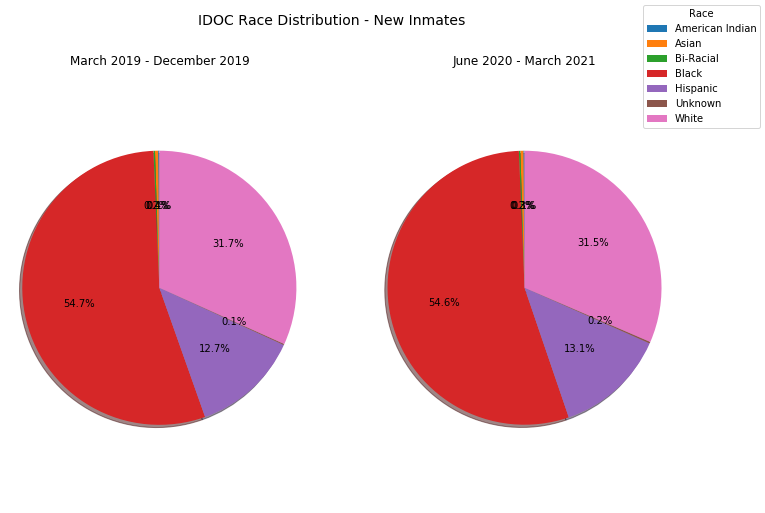

In [186]:
temp_df = race_dat[['March 2019', 'June 2019', 'September 2019', 'December 2019']].mean(axis = 1)
temp_df2 = race_dat[['June 2020', 'September 2020', 'December 2020', 'March 2021']].mean(axis = 1)

fig, axs = plt.subplots(1, 2, figsize = (12,8))

axs[0].pie(temp_df, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].axis('equal')  
axs[0].set_title('March 2019 - December 2019')

axs[1].pie(temp_df2, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].axis('equal') 
axs[1].set_title('June 2020 - March 2021')

fig.legend(race_dat.index,
          title="Race",
          loc="upper right")
          
fig.suptitle("IDOC Race Distribution - New Inmates", fontsize=14)
plt.show()

When looking at the hard numbers, the number of unknown has increased. This may indicate changing the race to "unknown" for certain individuals.

In [187]:
#finding the relative frequency of Race for new admissions in the last three months prior to the report
race_dat = newaverageprocess('Race')

In [188]:
race_dat = race_dat.style.format('{:.2%}')
race_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
American Indian,0.22%,0.14%,0.10%,0.19%,0.21%,0.16%,0.18%,0.15%,0.17%,0.01%,0.01%
Asian,0.29%,0.27%,0.26%,0.31%,0.18%,0.16%,0.26%,0.30%,0.11%,-0.17%,-0.07%
Bi-Racial,0.31%,0.32%,0.31%,0.23%,0.16%,0.16%,0.22%,0.05%,0.69%,0.39%,-0.02%
Black,52.21%,51.58%,52.12%,51.95%,51.24%,47.61%,46.86%,45.40%,47.17%,-4.80%,-5.21%
Hispanic,9.82%,9.53%,9.23%,9.92%,10.04%,10.14%,9.39%,10.14%,10.25%,0.62%,0.36%
Unknown,0.29%,0.19%,0.10%,0.16%,0.16%,0.08%,0.73%,0.75%,1.14%,0.96%,0.49%
White,36.86%,37.98%,37.89%,37.24%,38.01%,41.69%,42.37%,43.21%,40.47%,2.98%,4.44%


There is a decrease in the proportion of new admittees IDOC admittees who are black (-4.8%) when comparing March 2021 to the pre-COVID (March 2019 - December 2019) numbers, with a smaller increase in the proprtion of whites (+2.98%). Most of the rest of the change came from a higher percentage of unknown race (+0.96%), Hispanic (+0.62%), and Bi-Racial (+0.96%).

### The decrease in the proportion of the IDOC new admittees who are black grew slightly (-5.21%) and the  corresponding increase to the white population grew to 4.44% when taking into account the average June 2020 to March 2021.

In [189]:
race_dat = hardnewaverageprocess('Race')

In [190]:
race_dat['March Change From Pre-Covid (2019) Levels'] = race_dat['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
race_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = race_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
race_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
American Indian,10,13,6,8,8,2,5,3,3,-67.57%,-64.86%
Asian,13,26,16,13,7,2,7,6,2,-88.24%,-75.00%
Bi-Racial,14,31,19,10,6,2,6,1,12,-35.14%,-71.62%
Black,2361,4959,3175,2211,1945,587,1283,913,824,-74.06%,-71.61%
Hispanic,444,916,562,422,381,125,257,204,179,-69.45%,-67.36%
Unknown,13,18,6,7,6,1,20,15,20,81.82%,27.27%
White,1667,3651,2308,1585,1443,514,1160,869,707,-69.30%,-64.72%


The increase in "Unknown" is interesting. It appears that a large number of new inmates are coming in as unknown. This might be the beginning of a trend. It would be intresting to see which sentencing county these individuals are from.

In [191]:
unknown = df_Mar_2021[df_Mar_2021['Race'] == 'Unknown']
unknown = unknown['Sentencing County'].value_counts()
unknown

Cook           27
Will            6
DuPage          5
Lasalle         4
Randolph        3
Winnebago       2
Lake            2
Henry           2
Bureau          2
Lee             2
Whiteside       2
Monroe          2
Vermilion       2
Mason           1
Jersey          1
Rock Island     1
Iroquois        1
McHenry         1
Perry           1
White           1
Name: Sentencing County, dtype: int64

The majority of the inmates with "Unknown" listed as race are from Cook County. Although it is easy to assume that this is an effort to confound statistics, it could also be inmates refusing to answer. This is an area outside the scope of this study.

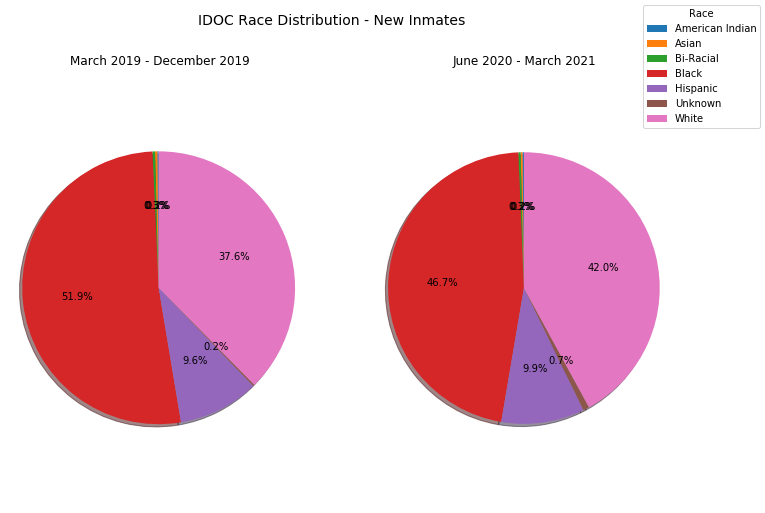

In [192]:
temp_df = race_dat[['March 2019', 'June 2019', 'September 2019', 'December 2019']].mean(axis = 1)
temp_df2 = race_dat[['June 2020', 'September 2020', 'December 2020', 'March 2021']].mean(axis = 1)

fig, axs = plt.subplots(1, 2, figsize = (12,8))

axs[0].pie(temp_df, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].axis('equal')  
axs[0].set_title('March 2019 - December 2019')

axs[1].pie(temp_df2, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].axis('equal') 
axs[1].set_title('June 2020 - March 2021')

fig.legend(race_dat.index,
          title="Race",
          loc="upper right")
          
fig.suptitle("IDOC Race Distribution - New Inmates", fontsize=14)
plt.show()

## Sex of the IDOC Population

In [193]:
#finding the relative frequency of Sex for the total population for the average of COVID months
sex_dat = averageprocess('Sex')

In [194]:
sex_dat = sex_dat.style.format('{:.2%}')
sex_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Female,5.90%,5.95%,5.95%,5.93%,5.76%,5.31%,5.17%,4.85%,4.67%,-1.26%,-0.93%
Male,94.10%,94.05%,94.05%,94.07%,94.24%,94.69%,94.83%,95.15%,95.33%,1.26%,0.93%


In [195]:
#finding the relative frequency of Sex for new admissions in the last three months prior to the report for the average of COVID months
sex_dat = newaverageprocess('Sex')

In [196]:
sex_dat = sex_dat.style.format('{:.2%}')
sex_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Female,8.82%,8.61%,8.27%,9.05%,9.04%,8.84%,6.76%,5.82%,7.27%,-1.42%,-1.52%
Male,91.18%,91.39%,91.73%,90.95%,90.96%,91.16%,93.24%,94.18%,92.73%,1.42%,1.52%


In [197]:
#finding the hard numbers of Sex for new admissions in the last three months prior to the report for the average of COVID months
sex_dat = hardaverageprocess('Sex')

In [198]:
sex_dat['March Change From Pre-Covid (2019) Levels'] = sex_dat['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
sex_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = sex_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
sex_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Female,2318,2314,2314,2260,2126,1702,1596,1413,1283,-44.25%,-34.89%
Male,36998,36606,36606,35880,34778,30346,29292,27698,26215,-28.22%,-22.27%


In [199]:
#finding the hard numbers of Sex for new admissions in the last three months prior to the report for the average of COVID months
sex_dat = hardnewaverageprocess('Sex')

In [200]:
sex_dat['March Change From Pre-Covid (2019) Levels'] = sex_dat['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
sex_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = sex_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
sex_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Female,399,828,504,385,343,109,185,117,127,-75.99%,-74.57%
Male,4123,8786,5588,3871,3453,1124,2553,1894,1620,-71.03%,-67.85%


### There is no significant change in the proportion of the population of men and women both in the whole population and new admittees from March 2019 and March 2021. There is a 1.52% decrease in the female population and corresponding increase to the male population. 

Because the number of new inmates has decreased so much, this amount could simply be variance in the female data as the hard figures show a difference of 76 from June to September 2020 when September only had 185 total.

## Parent Institution Comparison

In [201]:
# finding the relative frequency of Parent Institution for the average of COVID months
parent_dat = averageprocess('Parent Institution')

In [202]:
parent_dat = parent_dat.style.format('{:.2%}')
parent_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Big Muddy River,3.07%,3.08%,3.08%,3.20%,3.20%,3.35%,3.50%,3.64%,3.78%,0.67%,0.46%
Centralia,3.41%,3.28%,3.28%,3.25%,3.39%,3.47%,3.89%,3.83%,3.75%,0.44%,0.43%
Danville,4.37%,4.48%,4.48%,4.22%,4.33%,4.53%,4.79%,5.27%,5.10%,0.71%,0.53%
Decatur,1.65%,1.80%,1.80%,1.70%,1.45%,1.18%,1.23%,1.16%,1.02%,-0.72%,-0.59%
Dixon,5.65%,5.82%,5.82%,5.84%,5.87%,6.30%,6.25%,6.23%,6.50%,0.72%,0.54%
East Moline,3.23%,3.27%,3.27%,3.17%,2.98%,2.93%,2.75%,2.71%,2.61%,-0.63%,-0.49%
Graham,4.74%,4.87%,4.87%,4.72%,5.04%,5.23%,4.89%,4.95%,4.96%,0.16%,0.21%
Hill,4.55%,4.40%,4.40%,4.43%,4.36%,4.74%,4.99%,5.29%,5.55%,1.10%,0.70%
Illinois River,5.50%,4.68%,4.68%,5.03%,4.90%,4.81%,5.01%,4.95%,5.41%,0.43%,0.07%
Jacksonville,2.74%,2.95%,2.95%,2.95%,2.89%,2.61%,2.37%,1.95%,1.75%,-1.14%,-0.73%


### The proportion of prisoners housed at each prison has changed when comparing the COVID average to the pre-COVID average; however, it is difficult to tell if these are significant changes. We will consider the hard numbers to look for more significant features.

In [203]:
# finding the hard figure of Parent Institution for average COVID months
parent_dat = hardaverageprocess('Parent Institution')

In [204]:
parent_dat['March Change From Pre-Covid (2019) Levels'] = parent_dat['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
parent_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = parent_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
parent_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Big Muddy River,1208,1198,1198,1222,1182,1075,1081,1060,1040,-13.80%,-11.81%
Centralia,1342,1277,1277,1238,1250,1112,1200,1115,1031,-19.67%,-13.17%
Danville,1719,1743,1743,1611,1599,1451,1480,1533,1403,-17.66%,-13.92%
Decatur,648,701,701,650,535,379,379,338,280,-58.52%,-49.04%
Dixon,2220,2264,2264,2227,2168,2018,1931,1813,1788,-20.31%,-15.88%
East Moline,1270,1274,1274,1209,1101,938,848,789,718,-42.87%,-34.49%
Graham,1864,1894,1894,1802,1859,1675,1510,1440,1364,-26.80%,-19.65%
Hill,1787,1714,1714,1688,1609,1518,1542,1541,1526,-11.57%,-11.24%
Illinois River,2162,1823,1823,1917,1810,1542,1546,1442,1487,-23.00%,-22.11%
Jacksonville,1079,1147,1147,1126,1066,836,731,568,482,-57.15%,-41.83%


Interestingly, the drop in population is not consistent across IDOC facilities. Vandalia, Southwestern Illinois, Robinson, Lincoln, the Kewanee Reentry Center, Jacksonville, and Decatur all saw population decreases greater than 50% when considering March 2021 compared to pre-COVID numbers. Vandalia was hit the hardest.

### When considering the average of COVID as compared to pre-COVID populations, Vandalia was also hit the hardest, with a 55.91% drop. Decatur, Jacksonville, Robinson, and the Kewanee Reentry Center had drops over 40%.

If you consider hard numbers, instead of the normalized population, the only increase to the population is Joliet Treatment Center. However, some prison populations have gone down more than others. The prior normalized data; however, show that there are increases and decreases to where the population is housed. This tends to indicate that inmates are being moved (or sent) to particular prisons over others.

In [205]:
# code to export table to Excel for communication purposes
parent_dat.to_excel('parent_pop.xlsx')

In [206]:
#Percent overall change
print('March 2019 Population: ', sum(parent_dat['March 2019']))
print('December 2020 Population: ', sum(parent_dat['December 2020']))
print('March 2021 Population: ', sum(parent_dat['March 2021']))
print('March 2019 to December 2020 Population Change: ', ((sum(parent_dat['December 2020']) - sum(parent_dat['March 2019']))/ (sum(parent_dat['March 2019'])))*100)
print('March 2019 to March 2021 Population Change: ', ((sum(parent_dat['March 2021']) - sum(parent_dat['March 2019']))/ (sum(parent_dat['March 2019'])))*100)

March 2019 Population:  39316
December 2020 Population:  29111
March 2021 Population:  27498
March 2019 to December 2020 Population Change:  -25.95635364737003
March 2019 to March 2021 Population Change:  -30.059009054837727


### Overall, the prison population has fallen nearly 26% from March 2019 to December 2020. This is consistent with the 25% figure the governor has given. However, this figure does not account for the IDOC-remanded prisoners held at county jails, which could encompass over an estimated 2000 prisoners (according to the Illinois Sheriff's Association lawsuit, which is a 2020 figure).

In [207]:
#finding the hard figure of Parent Institution for processing facilities
parent_dat = hardaverageprocess('Parent Institution')
processing = parent_dat.loc[['Logan', 'Menard', 'Graham', 'Stateville']]

In [208]:
processing['March Change From Pre-Covid (2019) Levels'] = processing['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
processing['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = processing['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
processing

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Logan,1665,1609,1609,1605,1585,1324,1218,1076,1004,-38.10%,-28.76%
Menard,2676,2187,2187,2134,2203,2086,2174,2224,2157,-6.05%,-5.91%
Graham,1864,1894,1894,1802,1859,1675,1510,1440,1364,-26.80%,-19.65%
Stateville,2936,2872,2872,2878,2835,2315,2121,2318,2162,-25.18%,-22.86%


The "processing" centers of Graham, Menard, and Logan have claimed to be at capacity for a large percentage of the time and unable to take prisoners. According to this, their populations have significantly decreased. Stateville has only been taking a few prisoners at a time, but their population has decreased less than Graham and Logan.

The March figures have shown a very slight lessening of the decrease for Stateville, but a contiued decrease for the other processing centers.

## As the population of the facilities responsible for "processing" new prisoners has fallen, and it appears that they should have surplus capacity for processing it is important to find the pre-COVID processing capacity and current processing capacity. 

In [209]:
processing = processing.drop(['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'], axis=1)
processing = processing.drop(['March Change From Pre-Covid (2019) Levels'], axis=1)
dates = processing[['March 2019', 'June 2019', 'December 2019', 'March 2020', 'June 2020', 'September 2020', 'December 2020', 'March 2021']]
date_new = []
for date in dates:
    d = dt.datetime.strptime(date, '%B %Y')
    d = d.strftime('%B %Y')
    date_new.append(date)
date_new 

['March 2019',
 'June 2019',
 'December 2019',
 'March 2020',
 'June 2020',
 'September 2020',
 'December 2020',
 'March 2021']

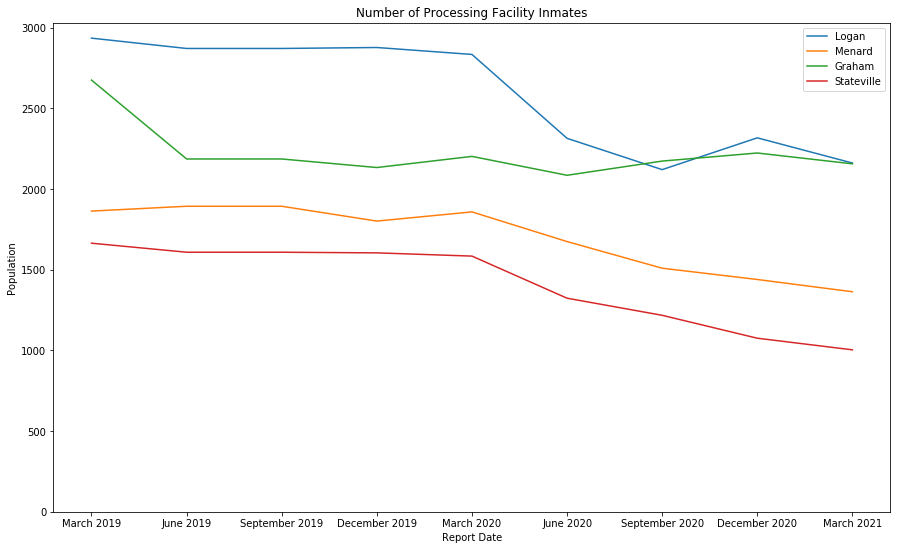

In [210]:
stateville = processing.loc['Stateville']
graham = processing.loc['Graham']
menard = processing.loc['Menard']
logan = processing.loc['Logan']
plt.figure(figsize = (15,9))
plt.plot(processing.columns, stateville)
plt.plot(processing.columns, graham)
plt.plot(processing.columns, menard)
plt.plot(processing.columns, logan)
plt.legend(processing.index)
plt.title('Number of Processing Facility Inmates')
plt.xlabel('Report Date')
plt.ylabel('Population')
plt.ylim(0)


plt.show()

When considering only the prisoners that were processed in the three months prior to the report, it is clear that the portion of prisoners going to each prison is changing. Vandalia, Western Illinois, Robinson, Pickneyville, Lincoln, Lawrence, and Illinois River, Hill, Decatur, Danville, and Centralia all lost over 1% population share when considering the March vs. pre-COVID figures. Stateville took up most of the increase, but Taylorville, Menard, and Dixon increased as well.

In [211]:
#finding the relative frequency of Parent Institution for new admissions in the last three months prior to the report when comparing average COVID and pre-COVID levels
parent_dat = newaverageprocess('Parent Institution')
parent_dat = parent_dat.style.format('{:.2%}')
parent_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Big Muddy River,0.84%,1.81%,1.64%,1.13%,1.24%,1.87%,2.52%,1.04%,2.18%,0.82%,0.55%
Centralia,1.75%,2.80%,3.33%,2.11%,2.95%,0.49%,5.81%,0.90%,0.86%,-1.64%,-0.49%
Danville,1.53%,4.05%,3.94%,1.29%,3.64%,0.49%,5.11%,5.07%,0.97%,-1.73%,0.21%
Decatur,1.75%,2.44%,1.95%,1.67%,1.50%,0.00%,1.31%,1.04%,0.74%,-1.21%,-1.18%
Dixon,2.48%,3.46%,3.04%,1.20%,0.87%,2.68%,1.64%,0.70%,4.06%,1.52%,-0.27%
East Moline,1.30%,1.25%,0.90%,1.13%,0.50%,0.65%,0.55%,3.58%,0.57%,-0.57%,0.19%
Graham,10.11%,6.15%,8.09%,10.20%,12.46%,17.44%,7.74%,10.79%,9.16%,0.52%,2.65%
Hill,1.84%,1.90%,2.04%,0.89%,0.82%,0.49%,2.08%,1.84%,0.63%,-1.04%,-0.41%
Illinois River,4.33%,2.50%,1.79%,5.43%,1.79%,1.30%,5.77%,2.19%,1.55%,-1.97%,-0.81%
Jacksonville,1.42%,4.11%,3.17%,3.78%,2.32%,0.89%,0.66%,0.25%,2.29%,-0.83%,-2.10%


When considering only the prisoners that were processed in the three months prior to the report, it is clear that the portion of prisoners going to each prison is changing. For the average of COVID months, Vandalia, Western Illinois, Shawnee, Robinson, Pickneyville, Lincoln, Lawrence, and Jacksonville all lost over 1% population share when considering the COVID vs. pre-COVID figures. 

When considering March, Vandalia, Western Illinois, Robinson, Pickneyville, Lincoln, Lawrence, and Illinois River, Hill, Decatur, Danville, and Centralia all lost over 1% population share. Stateville took up most of the increase, but Taylorville, Menard, and Dixon increased as well.

### A higher portion of new prisoners are going to Stateville, Graham, and Menard. As these are "processing" centers it appears that the administration was concentrating the new inmates in these centers. Whether this was in order to confound statistics or as some new administrative policy cannot be determined from these figures.

It is also interesting to note the increase in Taylorville and Dixon. These increases were higher in March than in the average, which indicates that there might be an emerging trend of sending new inmates to these institutions.

In [212]:
#finding the hard numbers of Parent Institution for new admissions in the last three months prior to the report in March compared to pre-COVID
parent_dat = hardnewaverageprocess('Parent Institution')

In [213]:
import numpy as np
np.mean(parent_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'])

-0.7207414838511007

#### The mean new population decrease as calculated with an average of COVID levels was -72%.

In [214]:
parent_dat['March Change From Pre-Covid (2019) Levels'] = parent_dat['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
parent_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = parent_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
parent_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Big Muddy River,38.0,174,100,48,47.0,23.0,69.0,21.0,38.0,-57.78%,-58.06%
Centralia,79.0,269,203,90,112.0,6.0,159.0,18.0,15.0,-90.64%,-69.11%
Danville,69.0,389,240,55,138.0,6.0,140.0,102.0,17.0,-90.97%,-64.81%
Decatur,79.0,235,119,71,57.0,0.0,36.0,21.0,13.0,-89.68%,-86.11%
Dixon,112.0,333,185,51,33.0,33.0,45.0,14.0,71.0,-58.30%,-76.06%
East Moline,59.0,120,55,48,19.0,8.0,15.0,72.0,10.0,-85.82%,-62.77%
Graham,457.0,591,493,434,473.0,215.0,212.0,217.0,160.0,-67.59%,-59.29%
Hill,83.0,183,124,38,31.0,6.0,57.0,37.0,11.0,-89.72%,-74.07%
Illinois River,196.0,240,109,231,68.0,16.0,158.0,44.0,27.0,-86.08%,-68.43%
Jacksonville,64.0,395,193,161,88.0,11.0,18.0,5.0,40.0,-80.32%,-90.90%


When considering only the prisoners that were processed in the three months prior to the report, nearly all prisons had a decrease in new population as compared to March 2019. In March as compared to pre-COVID, Vandalia, Southwestern Illinois, Pontiac, Pickneyville, Lawrence, Danville, and Centralia had over 90% decreases. Despite nearly all prisons having a decrease in new population in December 2020 compared to March 2019, Joliet Treatment Center increased in population.

### Nearly all prisons had significant decreases in new population during COVID as expected. However, Western Illinois, Vandalia, Southwestern Illinois, Shawnee, Robinson, Pontiac, Pickneyville, Lincoln, Lawrence, Kewanee Reentry Center, Jacksonville, and Decatur averaged over 80% decreases. If you cross-reference those institutions with those that had 90% decreases in the last quarter, Vandalia, Southwestern Illinois, Pontiac, Pickneyville, and Lawrence appear to be "winding down".

In [215]:
processing = parent_dat.loc[['Stateville','Graham','Menard','Logan']]
processing

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Stateville,1019.0,1207,1087,1092,1156.0,616.0,835.0,929.0,753.0,-31.62%,-28.88%
Graham,457.0,591,493,434,473.0,215.0,212.0,217.0,160.0,-67.59%,-59.29%
Menard,188.0,357,256,182,155.0,61.0,163.0,142.0,94.0,-61.75%,-53.20%
Logan,317.0,588,385,312,285.0,109.0,149.0,96.0,114.0,-71.54%,-70.79%


### The number of new inmates decreased significantly for all processing centers, but declined significantly less for Stateville.

In [216]:
processing = processing.drop(['March Change From Pre-Covid (2019) Levels'], axis=1)
processing = processing.drop(['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'], axis = 1)

In [217]:
processing.head()

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021
Stateville,1019.0,1207,1087,1092,1156.0,616.0,835.0,929.0,753.0
Graham,457.0,591,493,434,473.0,215.0,212.0,217.0,160.0
Menard,188.0,357,256,182,155.0,61.0,163.0,142.0,94.0
Logan,317.0,588,385,312,285.0,109.0,149.0,96.0,114.0


In [218]:
# changing columns to datetime in orer to plot
dates = processing[['March 2019', 'June 2019', 'September 2019', 'December 2019', 'March 2020', 'June 2020', 'September 2020', 'December 2020', 'March 2021']]
date_new = []
for date in dates:
    d = dt.datetime.strptime(date, '%B %Y')
    d = d.strftime('%B %Y')
    date_new.append(date)
processing.columns = date_new

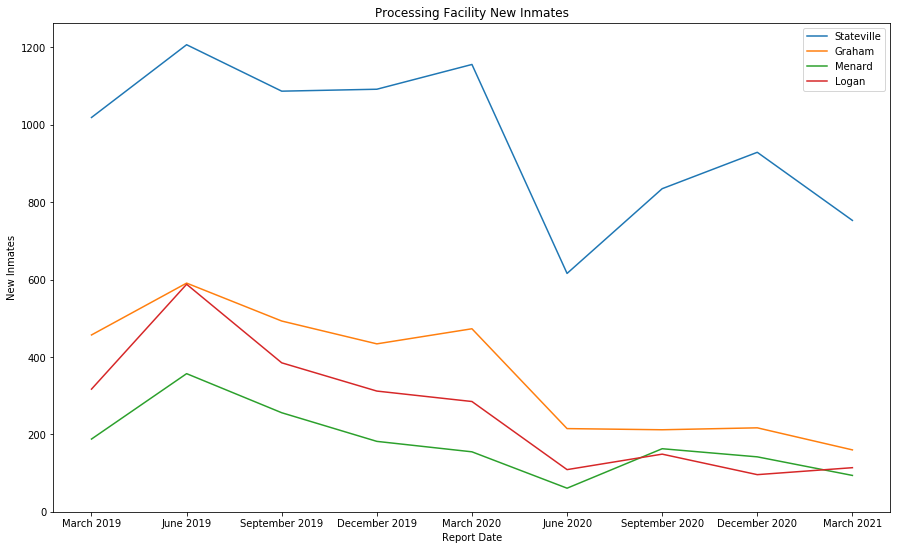

In [219]:
# plotting new inmates at processing facilities
stateville = processing.loc['Stateville']
graham = processing.loc['Graham']
menard = processing.loc['Menard']
logan = processing.loc['Logan']
plt.figure(figsize = (15,9))
plt.plot(processing.columns, stateville)
plt.plot(processing.columns, graham)
plt.plot(processing.columns, menard)
plt.plot(processing.columns, logan)
plt.legend(processing.index)
plt.title('Processing Facility New Inmates')
plt.xlabel('Report Date')
plt.ylabel('New Inmates')
plt.ylim(0)

plt.show()

## COVID Region

In [220]:
# finding the relative frequency for average COVID months
region_dat = averageprocess('COVID Region')

In [221]:
region_dat = region_dat.style.format('{:.2%}')
region_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
1,5.49%,5.56%,5.56%,5.64%,5.70%,5.60%,5.87%,5.89%,6.01%,0.45%,0.28%
10/11,46.49%,45.67%,45.67%,45.16%,44.59%,45.02%,43.92%,43.71%,43.99%,-1.76%,-1.59%
2,10.53%,10.60%,10.60%,10.66%,10.90%,11.04%,11.58%,11.55%,11.67%,1.08%,0.86%
3,5.87%,5.92%,5.92%,5.95%,6.01%,5.79%,5.82%,5.96%,6.02%,0.10%,-0.02%
4,5.72%,5.98%,5.98%,6.15%,6.32%,6.22%,6.29%,6.21%,6.08%,0.12%,0.24%
5,4.75%,4.76%,4.76%,4.94%,4.99%,4.96%,5.05%,5.15%,5.11%,0.30%,0.27%
6,8.76%,9.12%,9.12%,9.04%,8.91%,8.76%,8.75%,8.89%,8.79%,-0.22%,-0.21%
7,3.71%,3.54%,3.54%,3.53%,3.45%,3.40%,3.32%,3.38%,3.25%,-0.33%,-0.24%
8,5.32%,5.42%,5.42%,5.42%,5.47%,5.53%,5.52%,5.46%,5.32%,-0.07%,0.06%
9,3.36%,3.42%,3.42%,3.51%,3.64%,3.69%,3.88%,3.79%,3.76%,0.33%,0.35%


### An examination of COVID Regions of the population shows little change when considering the relative frequency. 

COVID region 10/11 falls the most with a 1.59% drop in share of population. This changes little when only considering March 2021 against pre-COVID levels (-1.76%).

### COVID regions showed differences that might be interesting to examine with a chart, but are generally down across all regions. The percentage decrease varies fromm 28.25% (Region 7) to 15.17%, but these figures do not correspond with significant changes to proportion of population.

In [222]:
# finding the relative frequency for average COVID months in order to plot
region_dat = averageprocess('COVID Region')

# dropping June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels in order to plot
region_dat = region_dat.drop('June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels', axis = 1)
region_dat = region_dat.drop('March Change From Pre-Covid (2019) Levels', axis = 1)

In [223]:
# changing columns to datetime in orer to plot
dates = processing[['March 2019', 'June 2019', 'September 2019', 'December 2019', 'March 2020', 'June 2020', 'September 2020', 'December 2020', 'March 2021']]
date_new = []
for date in dates:
    d = dt.datetime.strptime(date, '%B %Y')
    d = d.strftime('%B %Y')
    date_new.append(date)
region_dat.columns = date_new

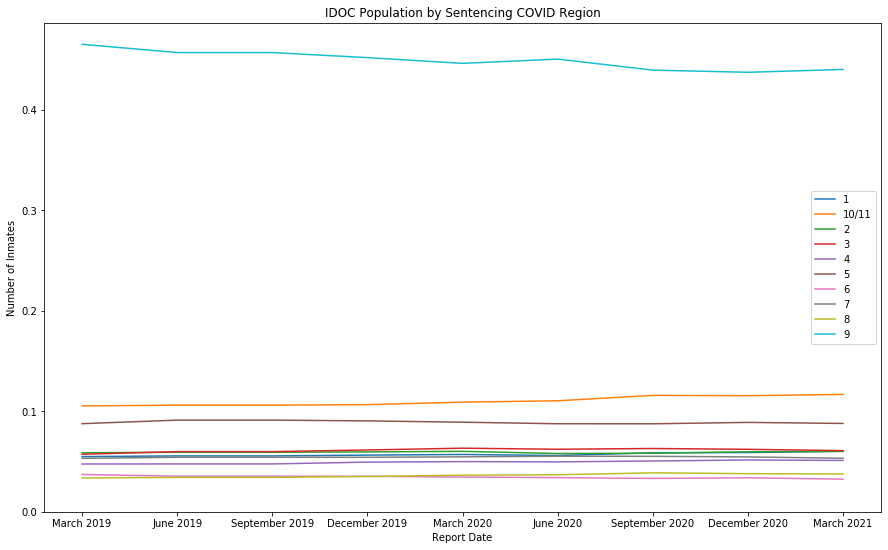

In [224]:
# plotting new inmates at processing facilities
plt.figure(figsize = (15,9))
plt.plot(region_dat.columns, region_dat.loc['1'])
plt.plot(region_dat.columns, region_dat.loc['2'])
plt.plot(region_dat.columns, region_dat.loc['3'])
plt.plot(region_dat.columns, region_dat.loc['4'])
plt.plot(region_dat.columns, region_dat.loc['5'])
plt.plot(region_dat.columns, region_dat.loc['6'])
plt.plot(region_dat.columns, region_dat.loc['7'])
plt.plot(region_dat.columns, region_dat.loc['8'])
plt.plot(region_dat.columns, region_dat.loc['9'])
plt.plot(region_dat.columns, region_dat.loc['10/11'])
plt.legend(region_dat.index)
plt.title('IDOC Population by Sentencing COVID Region')
plt.xlabel('Report Date')
plt.ylabel('Number of Inmates')
plt.ylim(0)
plt.show()

In [225]:
region_dat = newaverageprocess('COVID Region')

In [226]:
region_dat = region_dat.style.format('{:.2%}')
region_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
1,6.68%,6.62%,6.76%,6.93%,6.43%,6.73%,8.91%,7.36%,9.56%,2.81%,1.39%
10/11,42.48%,39.85%,40.56%,39.80%,38.33%,32.68%,28.56%,30.73%,33.20%,-7.47%,-9.38%
2,10.42%,10.47%,10.65%,10.24%,11.30%,12.65%,15.63%,11.49%,14.31%,3.86%,3.07%
3,6.83%,7.03%,6.81%,7.42%,6.93%,8.43%,7.34%,9.85%,9.85%,2.82%,1.84%
4,6.32%,7.46%,7.32%,7.73%,7.90%,9.16%,7.34%,7.36%,6.35%,-0.85%,0.35%
5,5.44%,5.30%,5.06%,5.69%,6.45%,6.41%,6.79%,7.31%,5.72%,0.35%,1.19%
6,9.00%,10.50%,10.47%,8.91%,9.27%,10.14%,10.59%,12.33%,10.48%,0.76%,1.17%
7,4.07%,3.82%,3.89%,4.11%,3.82%,3.08%,3.29%,4.62%,2.40%,-1.57%,-0.62%
8,4.67%,5.17%,4.68%,4.79%,4.69%,5.35%,5.08%,5.22%,4.24%,-0.59%,0.14%
9,4.09%,3.79%,3.79%,4.37%,4.87%,5.35%,6.46%,3.73%,3.89%,-0.12%,0.85%


### Region 10/11 had a 9.38% drop in share of new inmates in the COVID months. The share was replaced primarily by Region 2 (3.07%),  with Region 1, 3, 5, 6 each increasing over 1%.

In March, new inmates fell the most from region 10/11 (Chicago and Cook county). The difference in relative frequency moved mostly to Region 1, 2, and 3.

In [227]:
# finding the hard numbers of COVID Region for new admissions in the last three months prior to the report for the average COVID months
region_dat = hardnewaverageprocess('COVID Region')

In [228]:
region_dat['March Change From Pre-Covid (2019) Levels'] = region_dat['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
region_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = region_dat['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
region_dat

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
1,302,636,412,295,244,83,244,148,167,-59.39%,-60.97%
10/11,1921,3831,2471,1694,1455,403,782,618,580,-76.61%,-75.97%
2,471,1007,649,436,429,156,428,231,250,-60.98%,-58.45%
3,309,676,415,316,263,104,201,198,172,-59.91%,-60.66%
4,286,717,446,329,300,113,201,148,111,-75.03%,-67.77%
5,246,510,308,242,245,79,186,147,100,-69.37%,-60.80%
6,407,1009,638,379,352,125,290,248,183,-69.91%,-65.23%
7,184,367,237,175,145,38,90,93,42,-82.55%,-72.69%
8,211,497,285,204,178,66,139,105,74,-75.27%,-67.92%
9,185,364,231,186,185,66,177,75,68,-71.84%,-60.04%


### The new inmate losses evened out slightly when considering the average COVID months. Region 10/11 led the decrease with a 75.97% loss. Region 7 also lost 72.69%.

In March, new inmates fell the most from region 7 (-82.55%). Chicago and Cook County fell 76.61% and regions 4, 8, and 9 fell greater than 70%. 

In [229]:
# dropping June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels in order to plot
region_dat = region_dat.drop('June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels', axis = 1)
region_dat = region_dat.drop('March Change From Pre-Covid (2019) Levels', axis = 1)

In [230]:
# changing columns to datetime in orer to plot
dates = processing[['March 2019', 'June 2019', 'September 2019', 'December 2019', 'March 2020', 'June 2020', 'September 2020', 'December 2020', 'March 2021']]
date_new = []
for date in dates:
    d = dt.datetime.strptime(date, '%B %Y')
    d = d.strftime('%B %Y')
    date_new.append(date)
region_dat.columns = date_new

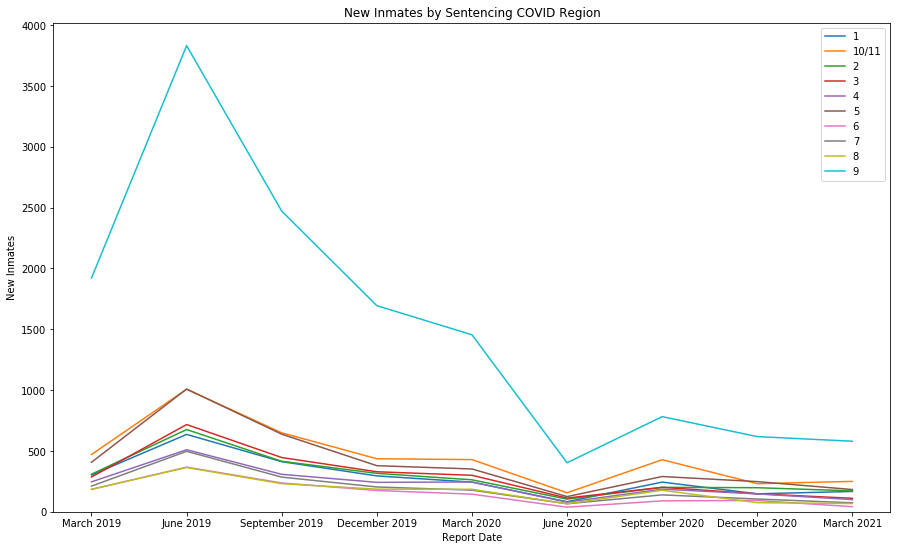

In [231]:
# plotting new inmates at processing facilities
plt.figure(figsize = (15,9))
plt.plot(region_dat.columns, region_dat.loc['1'])
plt.plot(region_dat.columns, region_dat.loc['2'])
plt.plot(region_dat.columns, region_dat.loc['3'])
plt.plot(region_dat.columns, region_dat.loc['4'])
plt.plot(region_dat.columns, region_dat.loc['5'])
plt.plot(region_dat.columns, region_dat.loc['6'])
plt.plot(region_dat.columns, region_dat.loc['7'])
plt.plot(region_dat.columns, region_dat.loc['8'])
plt.plot(region_dat.columns, region_dat.loc['9'])
plt.plot(region_dat.columns, region_dat.loc['10/11'])
plt.legend(region_dat.index)
plt.title('New Inmates by Sentencing COVID Region')
plt.xlabel('Report Date')
plt.ylabel('New Inmates')
plt.ylim(0)
plt.show()

### It is interesting to note how Chicago and Cook County's percentage of the new inmates decreased after COVID began. These are new inmates, so either fewer people in Cook County were being convicted, or more were being held in Cook County facilities. It is impossible to make that determination at this time. It is also interesting that this trend seemed to begin during COVID, between March 2020 and June 2020.

In [232]:
crime_class = averageprocess('Crime Class')

In [233]:
crime_class = crime_class.style.format('{:.2%}')
crime_class

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Class 1,14.57%,14.22%,14.22%,14.00%,13.83%,13.89%,13.79%,13.53%,13.20%,-1.06%,-0.65%
Class 2,19.04%,18.94%,18.94%,18.78%,18.67%,17.43%,17.32%,16.78%,16.07%,-2.85%,-2.02%
Class 3,9.10%,9.82%,9.82%,9.83%,9.61%,7.80%,7.44%,6.80%,6.12%,-3.52%,-2.60%
Class 4,8.78%,8.77%,8.77%,8.59%,8.11%,5.58%,5.12%,4.53%,4.04%,-4.68%,-3.91%
Class M,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
Class X,30.92%,30.60%,30.60%,30.89%,31.49%,34.47%,34.93%,35.89%,37.00%,6.24%,4.82%
Murder,17.15%,17.21%,17.21%,17.47%,17.83%,20.31%,20.88%,21.92%,22.99%,5.72%,4.26%
Unclassified,0.44%,0.43%,0.43%,0.44%,0.45%,0.52%,0.52%,0.55%,0.58%,0.14%,0.11%


In [234]:
# process for crime class
crime_class = hardaverageprocess('Crime Class')

/Users/brookemorrison/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [235]:
crime_class['March Change From Pre-Covid (2019) Levels'] = crime_class['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
crime_class['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = crime_class['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
crime_class

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Class 1,5729.0,5535.0,5535.0,5341.0,5105.0,4452.0,4258.0,3939.0,3629,-34.44%,-26.48%
Class 2,7485.0,7373.0,7373.0,7164.0,6891.0,5587.0,5351.0,4886.0,4420,-39.85%,-31.13%
Class 3,3578.0,3822.0,3822.0,3748.0,3546.0,2499.0,2298.0,1979.0,1683,-55.03%,-43.49%
Class 4,3450.0,3413.0,3413.0,3275.0,2994.0,1787.0,1583.0,1320.0,1112,-67.18%,-57.18%
Class M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,inf%,inf%
Class X,12158.0,11911.0,11911.0,11780.0,11621.0,11047.0,10788.0,10447.0,10173,-14.80%,-11.11%
Murder,6744.0,6699.0,6699.0,6664.0,6581.0,6510.0,6449.0,6380.0,6321,-5.68%,-4.28%
Unclassified,172.0,167.0,167.0,168.0,166.0,166.0,161.0,160.0,159,-5.64%,-4.15%


### Class 4 inmates decreased by the greatest percentage (-67.18%). Murder and unclassified both decreased the least, which is consistent with keeping the most dangerous criminals in DOC and releasing individuals charged with lesser crimes, which is the administration's policy. 

In [236]:
crime_class = newaverageprocess('Crime Class')

In [237]:
crime_class = crime_class.style.format('{:.2%}')
crime_class

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Class 1,12.05%,13.61%,12.90%,12.19%,12.96%,13.87%,14.50%,12.58%,12.14%,-0.55%,0.58%
Class 2,27.24%,28.03%,26.89%,27.30%,26.95%,28.63%,30.64%,32.22%,31.60%,4.23%,3.41%
Class 3,21.07%,22.56%,22.54%,22.51%,22.21%,22.06%,21.37%,20.54%,20.61%,-1.56%,-1.03%
Class 4,28.26%,23.36%,25.67%,26.01%,26.24%,21.17%,19.72%,18.70%,19.75%,-6.08%,-5.99%
Class X,10.39%,11.03%,10.54%,10.71%,10.54%,12.81%,12.13%,14.27%,14.54%,3.87%,2.77%
Murder,0.95%,1.40%,1.46%,1.22%,1.05%,1.38%,1.64%,1.69%,1.32%,0.06%,0.25%
Unclassified,0.02%,0.01%,0.00%,0.05%,0.05%,0.08%,0.00%,0.00%,0.06%,0.04%,0.01%


When taking into account the relative frequency of the data, the proportion of individuals incarcarated for Class 2 and Class X increased slightly, and individuals in Class 4 and Class 3 decreased slightly.

In [238]:
crime_class = hardnewaverageprocess('Crime Class')

In [239]:
crime_class['March Change From Pre-Covid (2019) Levels'] = crime_class['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
crime_class['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = crime_class['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
crime_class

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Class 1,545,1308,786.0,519,492,171,397.0,253.0,212,-73.15%,-67.29%
Class 2,1232,2695,1638.0,1162,1023,353,839.0,648.0,552,-67.18%,-64.44%
Class 3,953,2169,1373.0,958,843,272,585.0,413.0,360,-73.59%,-70.11%
Class 4,1278,2246,1564.0,1107,996,261,540.0,376.0,345,-77.72%,-75.43%
Class X,470,1060,642.0,456,400,158,332.0,287.0,254,-61.34%,-60.77%
Murder,43,135,89.0,52,40,17,45.0,34.0,23,-71.16%,-62.70%
Unclassified,1,1,0.0,2,2,1,0.0,0.0,1,0.00%,-50.00%


In hard figures, Class 4 decreased the most. CLass 2 and Class X decreased the least.

## Truth in Sentencing

Truth in Sentencing is the amount of time that incarcerated individuals must serve from their sentence. The higher the requirement to serve, the more serious the crime.

In [240]:
truth = averageprocess('Truth in Sentencing')

In [241]:
truth = truth.style.format('{:.2%}')
truth

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
100%,11.24%,11.51%,11.51%,11.81%,12.24%,14.05%,14.60%,15.46%,16.37%,4.85%,3.60%
75% Drug-Related Offenses,1.08%,1.03%,1.03%,1.03%,1.04%,1.12%,1.16%,1.20%,1.22%,0.18%,0.13%
85%,17.70%,17.95%,17.95%,18.31%,18.91%,21.19%,21.69%,22.53%,23.45%,5.47%,4.24%
85% Agg Arson,0.18%,0.17%,0.17%,0.18%,0.19%,0.20%,0.19%,0.19%,0.19%,0.01%,0.01%
85% Agg DUI w Bodily Harm,0.16%,0.16%,0.16%,0.18%,0.18%,0.19%,0.18%,0.18%,0.17%,0.00%,0.01%
85% Agg DUI w Death,0.69%,0.71%,0.71%,0.68%,0.72%,0.79%,0.80%,0.82%,0.85%,0.15%,0.12%
85% Agg Discharge Firearm,1.21%,1.20%,1.20%,1.22%,1.24%,1.32%,1.34%,1.44%,1.50%,0.29%,0.19%
85% Agg Domestic Battery,1.49%,1.60%,1.60%,1.66%,1.79%,1.90%,1.97%,1.98%,2.05%,0.47%,0.39%
85% Armed Habitual Criminal,1.96%,1.94%,1.94%,1.97%,1.99%,2.18%,2.16%,2.20%,2.26%,0.30%,0.24%
85% Bodily Harm,0.85%,0.80%,0.80%,0.80%,0.82%,0.90%,0.94%,0.99%,1.02%,0.21%,0.15%


Day-for-day decreased the most, which is consistent with lesser class felonies being released more frequently than higher classes. 100% sentences, which are murder charges, increased 4.85% and 85%, which implies drugs, increased 5.47%.

In [242]:
truth = hardaverageprocess('Truth in Sentencing')

In [243]:
# dropping summary columns for plot
truth = truth.drop('March Change From Pre-Covid (2019) Levels', axis = 1)
truth = truth.drop('June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels', axis = 1)

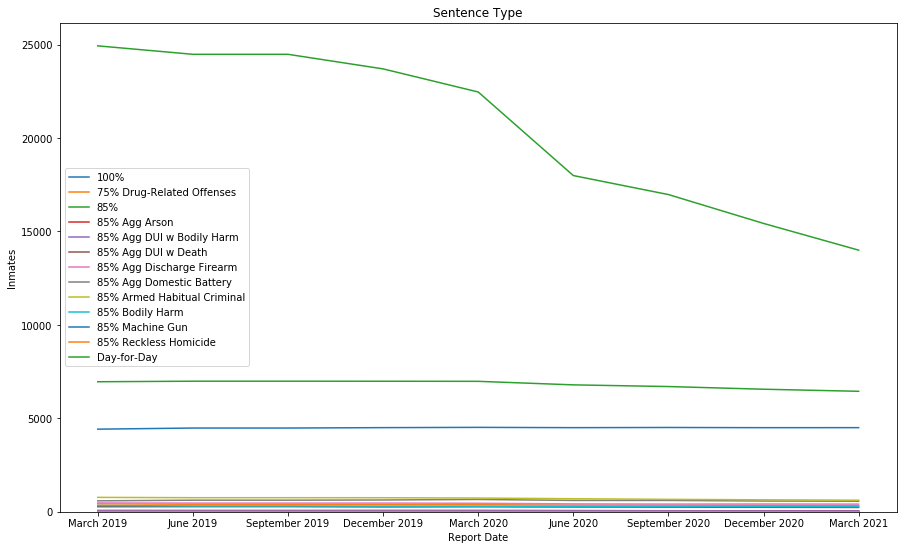

In [244]:
# plotting truth in sentencing
plt.figure(figsize = (15,9))
plt.plot(truth.columns, truth.iloc[0])
plt.plot(truth.columns, truth.iloc[1])
plt.plot(truth.columns, truth.iloc[2])
plt.plot(truth.columns, truth.iloc[3])
plt.plot(truth.columns, truth.iloc[4])
plt.plot(truth.columns, truth.iloc[5])
plt.plot(truth.columns, truth.iloc[6])
plt.plot(truth.columns, truth.iloc[7])
plt.plot(truth.columns, truth.iloc[8])
plt.plot(truth.columns, truth.iloc[9])
plt.plot(truth.columns, truth.iloc[10])
plt.plot(truth.columns, truth.iloc[11])
plt.plot(truth.columns, truth.iloc[12])


plt.legend(truth.index)
plt.title('Sentence Type')
plt.xlabel('Report Date')
plt.ylabel('Inmates')
plt.ylim(0)
plt.show()

In [245]:
truth = newaverageprocess('Truth in Sentencing')

In [246]:
truth = truth.style.format('{:.2%}')
truth

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
100%,0.80%,1.24%,1.25%,1.13%,0.92%,1.14%,1.35%,1.29%,1.03%,-0.07%,0.10%
75% Drug-Related Offenses,0.27%,0.29%,0.30%,0.19%,0.29%,0.32%,0.66%,0.55%,0.46%,0.20%,0.24%
85%,5.26%,5.60%,5.24%,5.43%,5.51%,8.68%,6.50%,7.21%,7.16%,1.77%,2.01%
85% Agg Arson,0.09%,0.05%,0.03%,0.05%,0.03%,0.00%,0.04%,0.10%,0.00%,-0.06%,-0.02%
85% Agg DUI w Bodily Harm,0.07%,0.15%,0.11%,0.14%,0.13%,0.00%,0.18%,0.10%,0.00%,-0.12%,-0.05%
85% Agg DUI w Death,0.24%,0.29%,0.31%,0.19%,0.32%,0.16%,0.22%,0.45%,0.34%,0.08%,0.03%
85% Agg Discharge Firearm,0.57%,0.47%,0.34%,0.70%,0.76%,0.65%,0.77%,0.99%,0.80%,0.28%,0.28%
85% Agg Domestic Battery,1.11%,1.52%,1.59%,1.50%,1.82%,2.11%,1.57%,1.64%,2.06%,0.63%,0.42%
85% Armed Habitual Criminal,0.73%,0.92%,0.89%,0.87%,0.63%,1.14%,0.62%,0.75%,1.14%,0.29%,0.06%
85% Bodily Harm,0.15%,0.09%,0.08%,0.12%,0.13%,0.08%,0.11%,0.25%,0.17%,0.06%,0.04%


When considering only new inmate, day-for-day decreased the most, with 85% increasing the most. This implies that new offenders might be incarerated for drugs more frequently.

In [247]:
truth = hardnewaverageprocess('Truth in Sentencing')

In [248]:
truth['March Change From Pre-Covid (2019) Levels'] = truth['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
truth['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = truth['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
truth

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
100%,36,119,76,48,35.0,14.0,37.0,26,18.0,-74.19%,-65.95%
75% Drug-Related Offenses,12,28,18,8,11.0,4.0,18.0,11,8.0,-51.52%,-37.88%
85%,238,538,319,231,209.0,107.0,178.0,145,125.0,-62.29%,-58.14%
85% Agg Arson,4,5,2,2,1.0,0.0,1.0,2,0.0,-100.00%,-76.92%
85% Agg DUI w Bodily Harm,3,14,7,6,5.0,0.0,5.0,2,0.0,-100.00%,-76.67%
85% Agg DUI w Death,11,28,19,8,12.0,2.0,6.0,9,6.0,-63.64%,-65.15%
85% Agg Discharge Firearm,26,45,21,30,29.0,8.0,21.0,20,14.0,-54.10%,-48.36%
85% Agg Domestic Battery,50,146,97,64,69.0,26.0,43.0,33,36.0,-59.66%,-61.34%
85% Armed Habitual Criminal,33,88,54,37,24.0,14.0,17.0,15,20.0,-62.26%,-68.87%
85% Bodily Harm,7,9,5,5,5.0,1.0,3.0,5,3.0,-53.85%,-53.85%


In [249]:
# dropping summary columns for plot
truth = truth.drop('March Change From Pre-Covid (2019) Levels', axis = 1)
truth = truth.drop('June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels', axis = 1)

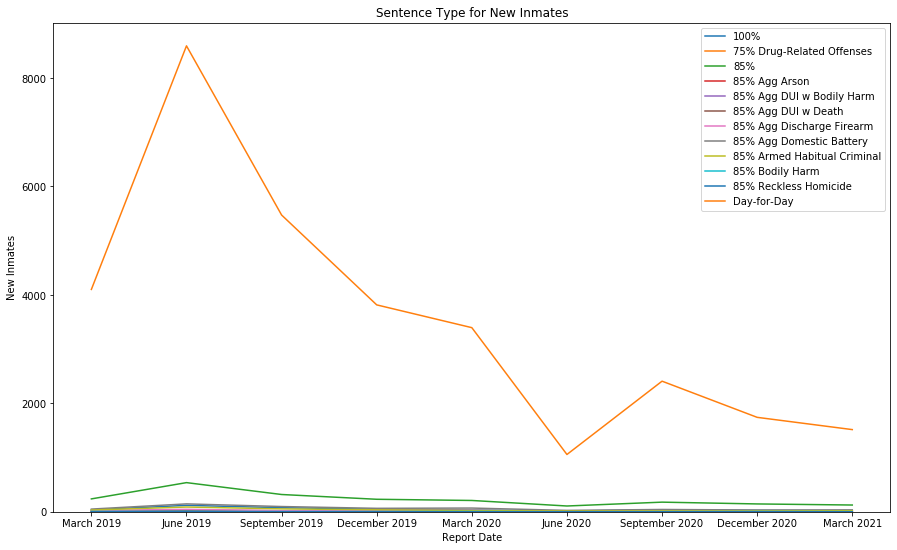

In [250]:
# plotting truth in sentencing
plt.figure(figsize = (15,9))
plt.plot(truth.columns, truth.iloc[0])
plt.plot(truth.columns, truth.iloc[1])
plt.plot(truth.columns, truth.iloc[2])
plt.plot(truth.columns, truth.iloc[3])
plt.plot(truth.columns, truth.iloc[4])
plt.plot(truth.columns, truth.iloc[5])
plt.plot(truth.columns, truth.iloc[6])
plt.plot(truth.columns, truth.iloc[7])
plt.plot(truth.columns, truth.iloc[8])
plt.plot(truth.columns, truth.iloc[9])
plt.plot(truth.columns, truth.iloc[10])
plt.plot(truth.columns, truth.iloc[11])



plt.legend(truth.index)
plt.title('Sentence Type for New Inmates')
plt.xlabel('Report Date')
plt.ylabel('New Inmates')
plt.ylim(0)
plt.show()

## Admission Type

The admission type allows us to see how the inmate arrived at the prison, for example, whether or not they came directly from a county court or if they were released and violated their parole.

In [251]:
admission_type = averageprocess('Admission Type')

In [252]:
admission_type = admission_type.style.format('{:.2%}')
admission_type

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Admit from other custody,0.23%,0.24%,0.24%,0.25%,0.25%,0.26%,0.30%,0.32%,0.33%,0.09%,0.06%
COVID-19 County Admit,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,2.69%,3.55%,0.00%,0.00%,1.56%
Conditional Release Violator,0.04%,0.04%,0.04%,0.04%,0.04%,0.05%,0.05%,0.05%,0.06%,0.02%,0.02%
Direct from court,44.07%,44.29%,44.29%,44.55%,44.74%,45.81%,44.33%,44.48%,46.60%,2.30%,1.01%
Discharged & recommitted,37.85%,37.84%,37.84%,37.99%,38.22%,38.09%,36.09%,35.26%,36.81%,-1.07%,-1.32%
"MSR violator, New sentence",4.99%,4.94%,4.94%,4.94%,5.03%,5.26%,5.11%,4.97%,5.18%,0.23%,0.18%
Not in IDOC custody,0.01%,0.01%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,-0.00%,-0.00%
"Parole violator, New sentence",0.14%,0.11%,0.11%,0.11%,0.12%,0.13%,0.12%,0.12%,0.13%,0.02%,0.01%
Return additional mittimus,2.59%,2.58%,2.58%,2.59%,2.64%,2.50%,2.31%,2.24%,2.32%,-0.27%,-0.24%
Return to Custody,0.01%,0.01%,0.01%,0.01%,0.01%,0.01%,0.01%,0.01%,0.00%,-0.00%,-0.00%


The relative number of inmates under each type of admission did not change significantly.

In [253]:
admission_type = hardaverageprocess('Admission Type')

/Users/brookemorrison/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [254]:
admission_type['March Change From Pre-Covid (2019) Levels'] = admission_type['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
admission_type['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = admission_type['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
admission_type

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Admit from other custody,91.0,94.0,94.0,96.0,91.0,84.0,92,94,92.0,-1.87%,-3.47%
COVID-19 County Admit,0.0,0.0,0.0,0.0,0.0,0.0,831,1032,0.0,nan%,inf%
Conditional Release Violator,14.0,14.0,14.0,14.0,15.0,15.0,15,15,16.0,14.29%,8.93%
Direct from court,17325.0,17238.0,17238.0,16993.0,16510.0,14681.0,13694,12950,12815.0,-25.49%,-21.30%
Discharged & recommitted,14883.0,14729.0,14729.0,14488.0,14105.0,12208.0,11149,10265,10122.0,-31.18%,-25.64%
"MSR violator, New sentence",1961.0,1923.0,1923.0,1883.0,1857.0,1686.0,1578,1447,1425.0,-25.88%,-20.21%
Not in IDOC custody,3.0,2.0,2.0,1.0,1.0,1.0,1,1,1.0,-50.00%,-50.00%
"Parole violator, New sentence",56.0,43.0,43.0,42.0,43.0,41.0,37,36,37.0,-19.57%,-17.93%
Return additional mittimus,1017.0,1004.0,1004.0,988.0,974.0,802.0,714,652,637.0,-36.51%,-30.10%
Return to Custody,3.0,3.0,3.0,3.0,2.0,2.0,2,2,1.0,-66.67%,-41.67%


In [255]:
admission_type = newaverageprocess('Admission Type')

In [256]:
admission_type = admission_type.style.format('{:.2%}')
admission_type

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Admit from other custody,0.11%,0.19%,0.21%,0.23%,0.08%,0.16%,0.44%,0.25%,0.11%,-0.07%,0.05%
COVID-19 County Admit,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,30.31%,19.34%,0.00%,0.00%,12.41%
Conditional Release Violator,0.00%,0.00%,0.00%,0.00%,0.03%,0.00%,0.00%,0.00%,0.06%,0.06%,0.01%
Direct from court,32.18%,33.84%,33.27%,31.65%,32.69%,26.93%,13.73%,18.85%,29.88%,-2.85%,-10.39%
Discharged & recommitted,37.26%,38.10%,35.88%,36.56%,37.07%,29.36%,14.97%,20.69%,32.11%,-4.84%,-12.67%
"MSR violator, New sentence",3.16%,3.56%,3.15%,3.57%,3.53%,4.46%,1.53%,1.79%,3.21%,-0.16%,-0.61%
"Parole violator, New sentence",0.00%,0.00%,0.00%,0.00%,0.03%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
Return additional mittimus,2.92%,3.38%,3.10%,3.12%,3.40%,2.19%,1.31%,1.59%,2.63%,-0.50%,-1.20%
Return to Custody,0.02%,0.01%,0.00%,0.02%,0.00%,0.00%,0.00%,0.00%,0.00%,-0.01%,-0.01%
Technical MSR violator,24.30%,20.87%,24.31%,24.79%,23.10%,36.74%,37.66%,37.44%,32.00%,8.43%,12.39%


Comparing the relative frequency of the admission type, technical MSR violators increased the most. Direct from court decreased 10.39% when averaging June 2020 - March 2021 compared to pre-COVID levels.

In [257]:
admission_type = hardnewaverageprocess('Admission Type')

In [258]:
admission_type['March Change From Pre-Covid (2019) Levels'] = admission_type['March Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
admission_type['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'] = admission_type['June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels'].apply('{:.2%}'.format)
admission_type

,March 2019,June 2019,September 2019,December 2019,March 2020,June 2020,September 2020,December 2020,March 2021,March Change From Pre-Covid (2019) Levels,June 2020 - March 2021 Average Change From Pre-Covid (2019) Levels
Admit from other custody,5.0,18.0,13.0,10.0,3.0,2.0,12.0,5.0,2.0,-82.61%,-54.35%
COVID-19 County Admit,0.0,0.0,0.0,0.0,0.0,0.0,830.0,389.0,0.0,nan%,inf%
Conditional Release Violator,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,inf%,inf%
Direct from court,1455.0,3253.0,2027.0,1347.0,1241.0,332.0,376.0,379.0,522.0,-74.16%,-80.09%
Discharged & recommitted,1685.0,3663.0,2186.0,1556.0,1407.0,362.0,410.0,416.0,561.0,-75.31%,-80.76%
"MSR violator, New sentence",143.0,342.0,192.0,152.0,134.0,55.0,42.0,36.0,56.0,-72.98%,-77.20%
"Parole violator, New sentence",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,nan%,nan%
Return additional mittimus,132.0,325.0,189.0,133.0,129.0,27.0,36.0,32.0,46.0,-76.38%,-81.90%
Return to Custody,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-100.00%,-100.00%
Technical MSR violator,1099.0,2006.0,1481.0,1055.0,877.0,453.0,1031.0,753.0,559.0,-60.36%,-50.43%


New admittees were down significantly across the different types of admissions. Technical MSR violators were the least affected when considering March compared to pre-COVID levels.